In [ ]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [53]:
sp500data = yf.download("^GSPC", start="2000-01-01", end="2023-10-16")
sp500_df = pd.DataFrame(sp500data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


In [54]:
sp500data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-04-10,4085.199951,4109.500000,4072.550049,4109.109863,4109.109863,3423650000
2023-04-11,4110.290039,4124.259766,4102.609863,4108.939941,4108.939941,3665830000
2023-04-12,4121.720215,4134.370117,4086.939941,4091.949951,4091.949951,3633120000


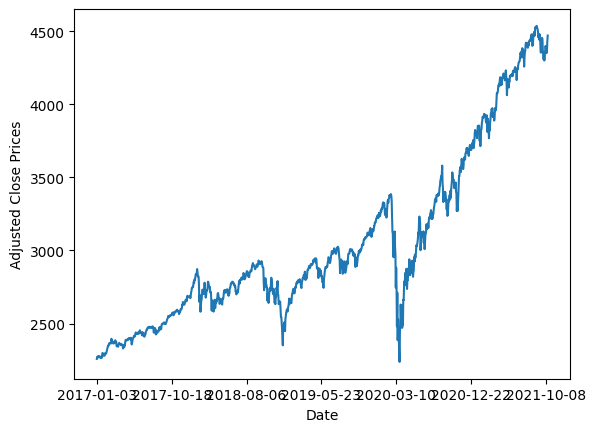

In [ ]:
read_df = pd.read_csv("sp500_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [ ]:
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [ ]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[2802.86056944 2269.85750483 2477.74466762 2766.66301296 2374.42506466
 4186.38753688 2634.95184493 3224.6825587  2642.15134695 2855.06226344
 3131.29479236 2468.950334   4471.22437158 4372.35380957 2449.15157999
 4226.55254199 2639.50649724 2433.13013304 2574.02973146 4442.45695459
 3804.28322217 3462.75922217 3693.31345703 2953.07781528 2977.10962773
 4365.6066488  3207.05099634 2557.40480942 4457.36409033 3246.82609651
 3909.51829541 2895.40942318 2839.78738238 2721.42121206 2278.46803987
 2782.98224145 3380.38209671 2514.85785607 2365.21841972 2941.80436097
 3470.12492676 4515.03218359 4251.40260934 3916.72142383 2659.2645638
 2976.54650081 3184.4597124  4439.67785669 2751.49107469 2279.15900854
 4203.51592741 3727.24902539 2951.28400113 2811.7957286  2872.68410491
 2426.05153603 2344.69569602 2737.90027594 2884.65725974 3286.42364014
 3556.61905762 2395.49148071 4146.90240527 2874.4843484  3965.50093457
 2931.24300486 4194.48325    3075.12630176 4523.85240527 3225.66883659
 2882.0

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': False}


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.2478
Mean Squared Error: 15.9311
Root Mean Squared Error: 3.9914
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.93 %.


In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
tendays_df = pd.DataFrame(predictions[:8])
tendays_df.to_csv("ten-days-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
            Predictions
Unnamed: 0             
2021-10-16  2269.857505
Sell price and date
            Predictions
Unnamed: 0             
2021-12-22  4523.852405


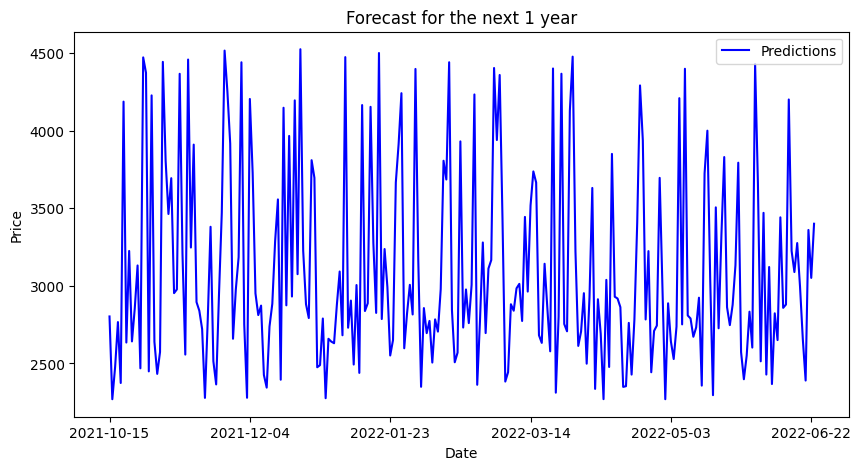

In [ ]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Unnamed: 0             
2021-10-16  2269.857505
Sell price and date
            Predictions
Unnamed: 0             
2021-10-27  4471.224372


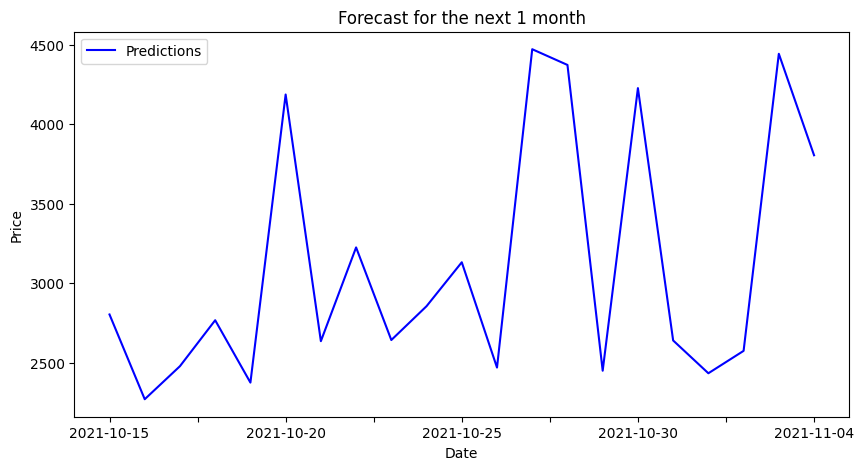

In [ ]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Unnamed: 0             
2021-10-16  2269.857505
Sell price and date
            Predictions
Unnamed: 0             
2021-10-20  4186.387537


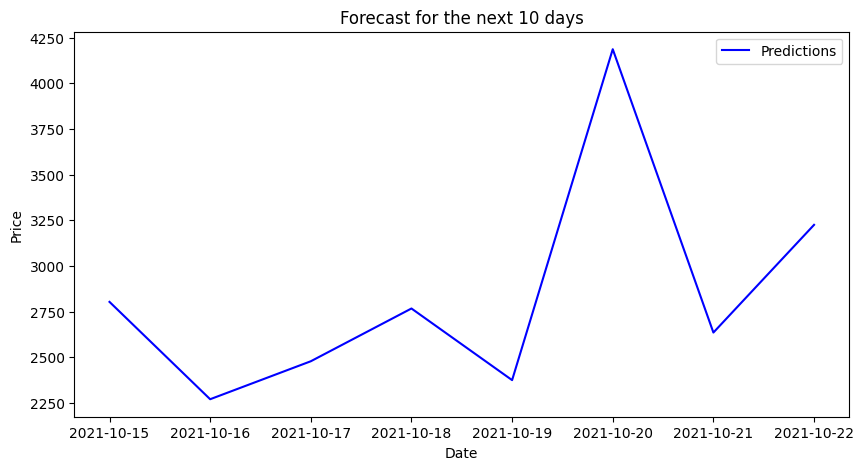

In [ ]:
tendays_df_pred = pd.read_csv("ten-days-predictions.csv")
tendays_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(tendays_df_pred["Predictions"])
sell_price = max(tendays_df_pred["Predictions"])
fivedays_buy = tendays_df_pred.loc[tendays_df_pred["Predictions"] == buy_price]
fivedays_sell =tendays_df_pred.loc[tendays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
tendays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 10 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Buy price and date
            Predictions
Unnamed: 0             
2021-10-16  2269.857505
Sell price and date
            Predictions
Unnamed: 0             
2021-10-15  2802.860569


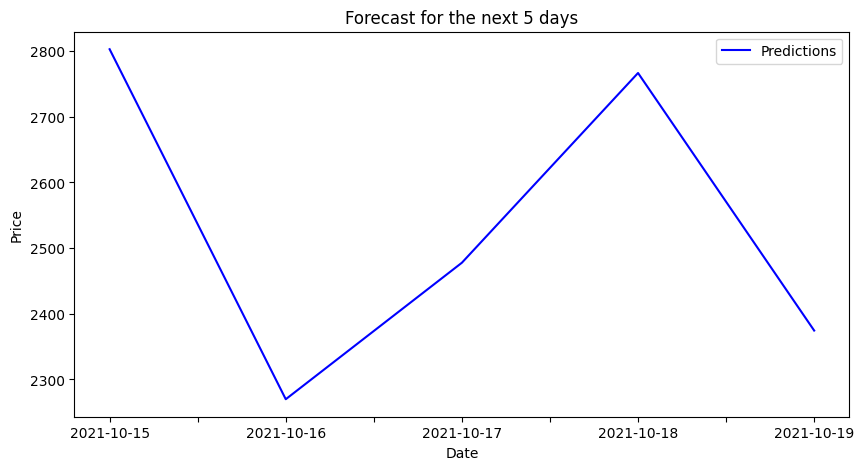

In [ ]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()